In [109]:
import scipy.integrate as sc
import matplotlib.pyplot as plt
import numpy as np
from ode_parameter_estimator import EstimationProblem
import pandas as pd
from datetime import datetime as dt

In [61]:
def seir_reinfeccion(t, z, *args):
    β, ϵ, α, γ = args
    S, E, I, R = z
    dSdt = -((β*S*I)/N) + ε*R
    dEdt =  ((β*S*I)/N) - α*E
    dIdt =  α*E   - γ*I
    dRdt =  γ*I   - ε*R
    return np.array([dSdt, dEdt, dIdt, dRdt])

In [ ]:
def seir_reinfeccion_2(z, t):
    S, E, I, R = z
    dSdt = -((β*S*I)/N) + ε*R
    dEdt =  ((β*S*I)/N) - α*E
    dIdt =  α*E   - γ*I
    dRdt =  γ*I   - ε*R
    return np.array([dSdt, dEdt, dIdt, dRdt])

In [32]:
city_indx = 2
ciudades = ['Bucaramanga', 'Floridablanca', 'Barrancabermeja']
df = pd.read_csv(f'Casos_positivos_de_COVID-19_en_Colombia_{ciudades[city_indx]}.csv')
df['fecha reporte web']= pd.to_datetime(df['fecha reporte web']).sort_values().to_list()
df['Fecha de notificación']= pd.to_datetime(df['Fecha de notificación']).sort_values().to_list()
df['Fecha de recuperación']= pd.to_datetime(df['Fecha de recuperación']).sort_values().to_list()
df['Fecha de inicio de síntomas'] = pd.to_datetime(df['Fecha de inicio de síntomas']).sort_values().to_list()
df['Fecha de diagnóstico'] = pd.to_datetime(df['Fecha de diagnóstico']).sort_values().to_list()
indx_timestamp = [15, 7, 4]
indx_xlim = [0,0,9900]

In [33]:
df.columns

Index(['fecha reporte web', 'ID de caso', 'Fecha de notificación',
       'Código DIVIPOLA departamento', 'Nombre departamento',
       'Código DIVIPOLA municipio', 'Nombre municipio', 'Edad',
       'Unidad de medida de edad', 'Sexo', 'Tipo de contagio',
       'Ubicación del caso', 'Estado', 'Código ISO del país',
       'Nombre del país', 'Recuperado', 'Fecha de inicio de síntomas',
       'Fecha de muerte', 'Fecha de diagnóstico', 'Fecha de recuperación',
       'Tipo de recuperación', 'Pertenencia étnica',
       'Nombre del grupo étnico'],
      dtype='object')

Text(0.5, 1.0, 'Data from: Barrancabermeja')

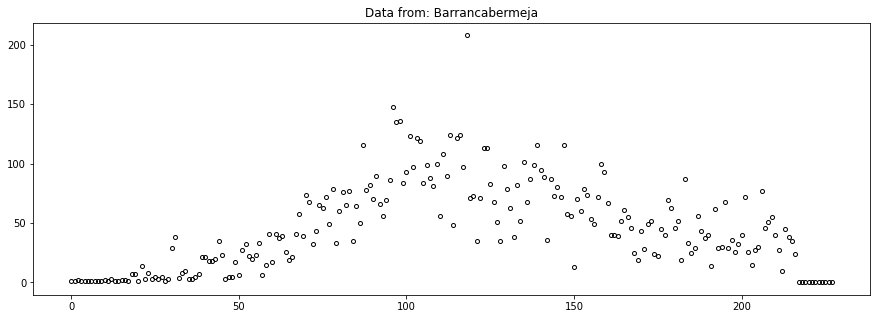

In [91]:
fig, ax = plt.subplots(figsize=(15, 5))
data_for_stuff = df.groupby('Fecha de inicio de síntomas').count()
data_fixed = data_for_stuff['Fecha de recuperación'].to_numpy()
t = np.arange(0, data_fixed.size)
ax.plot(data_fixed, marker='o', lw=0, ms=4, color='black', fillstyle='none')
ax.set_title(f'Data from: {ciudades[city_indx]}')

In [85]:
print(data_fixed.T.shape)
print(t.T.shape)


(228,)
(228,)


In [99]:
data_array = np.zeros((data_fixed.size, 4))
data_array[:,2] = data_fixed

In [105]:
t = np.arange(0, data_fixed.size)
problem = EstimationProblem(t, data_array, seir_reinfeccion)
promedio_recuperación = np.mean(df['Fecha de recuperación'] - df['Fecha de inicio de síntomas']).days
problem.fit([(0.1),(0.14),(0.1), (0.1)], rtol=0.001) # initial guess

ValueError: Bad initial parameters?

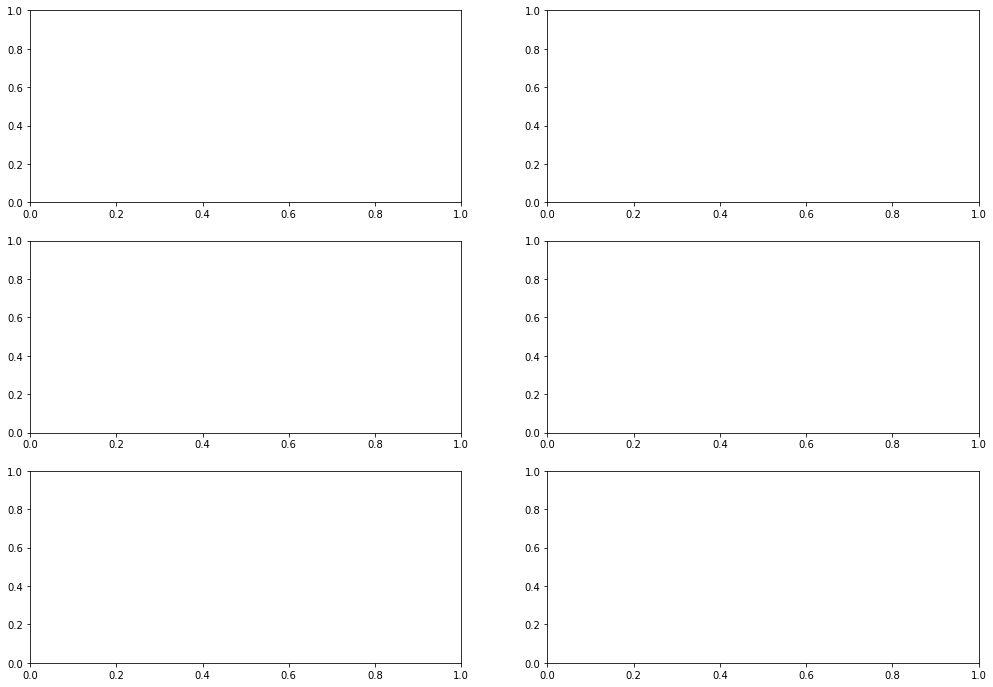

In [110]:
fig, ax = plt.subplots(3, 2 ,figsize=(17, 12))
for city in [0, 1, 2]:
    for column_ in [0, 1]:
        # Load Data
        city_indx = city
        ciudades = ['Bucaramanga', 'Floridablanca', 'Barrancabermeja']
        df = pd.read_csv(f'Casos_positivos_de_COVID-19_en_Colombia_{ciudades[city_indx]}.csv')
        df['fecha reporte web']= pd.to_datetime(df['fecha reporte web']).sort_values().to_list()
        df['Fecha de notificación']= pd.to_datetime(df['Fecha de notificación']).sort_values().to_list()
        df['Fecha de recuperación']= pd.to_datetime(df['Fecha de recuperación']).sort_values().to_list()
        df['Fecha de inicio de síntomas'] = pd.to_datetime(df['Fecha de inicio de síntomas']).sort_values().to_list()
        df['Fecha de diagnóstico'] = pd.to_datetime(df['Fecha de diagnóstico']).sort_values().to_list()
        indx_timestamp = [21, 8, 8]
        
        # Set Parameters 
        poblaciones = [581130, 316200, 191704]
        promedio_recuperacion = np.mean(df['Fecha de recuperación'] - df['Fecha de inicio de síntomas']).days
        beta_array = [0.034, 0.0318, 0.033]

        β = beta_array[city_indx]   # 1/días
        α = 1/7                     # 1/días
        γ = 1/promedio_recuperacion # 1/días
        ε = 1/(30*12)               # 1/días
        R_0 = β/γ

        # Valores iniciales
        S0 = poblaciones[city_indx]
        N  = S0 # población de Bucaramanga
        E0 = 0
        I0 = 1
        R0 = 0
        C0 = np.array([S0, E0, I0, R0])

In [17]:
dt.strptime(data["Fecha de notificación"],'%y/%m/%d %H:%M:%S')

TypeError: strptime() argument 1 must be str, not Series

In [6]:
data = pd.read_csv("C:/Users/juand/Downloads/Casos_positivos_de_COVID-19_en_Colombia_Bucaramanga.csv")

In [11]:
data["Fecha de inicio de síntomas"]

0        2020-08-23 00:00:00
1        2020-09-30 00:00:00
2        2020-09-28 00:00:00
3        2020-09-30 00:00:00
4        2020-10-01 00:00:00
                ...         
28725    2020-08-23 00:00:00
28726    2020-12-03 00:00:00
28727    2020-12-04 00:00:00
28728    2020-07-12 00:00:00
28729    2020-07-12 00:00:00
Name: Fecha de inicio de síntomas, Length: 28730, dtype: object

In [8]:
data["Fecha de notificación"]

0        2020-08-27 00:00:00
1        2020-10-05 00:00:00
2        2020-10-03 00:00:00
3        2020-10-05 00:00:00
4        2020-10-06 00:00:00
                ...         
28725    2020-08-25 00:00:00
28726    2020-12-04 00:00:00
28727    2020-12-05 00:00:00
28728    2020-07-23 00:00:00
28729    2020-07-20 00:00:00
Name: Fecha de notificación, Length: 28730, dtype: object

ValueError: not enough values to unpack (expected 4, got 0)

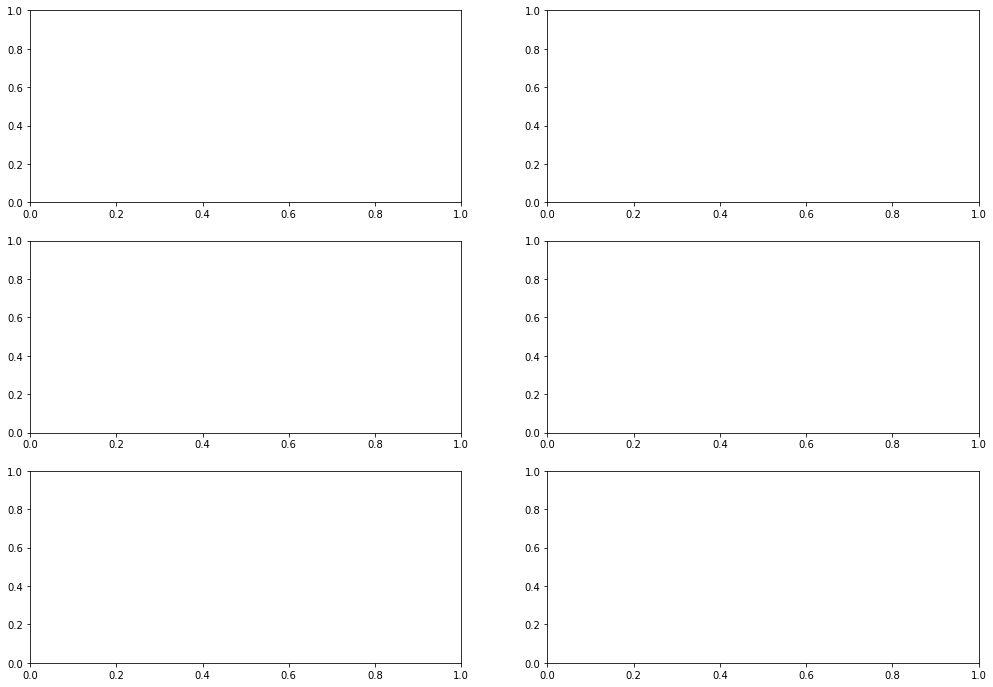

In [111]:
fig, ax = plt.subplots(3, 2 ,figsize=(17, 12))
for city in [0, 1, 2]:
    for column_ in [0, 1]:
        # Load Data
        city_indx = city
        ciudades = ['Bucaramanga', 'Floridablanca', 'Barrancabermeja']
        df = pd.read_csv(f'Casos_positivos_de_COVID-19_en_Colombia_{ciudades[city_indx]}.csv')
        df['fecha reporte web']= pd.to_datetime(df['fecha reporte web']).sort_values().to_list()
        df['Fecha de notificación']= pd.to_datetime(df['Fecha de notificación']).sort_values().to_list()
        df['Fecha de recuperación']= pd.to_datetime(df['Fecha de recuperación']).sort_values().to_list()
        df['Fecha de inicio de síntomas'] = pd.to_datetime(df['Fecha de inicio de síntomas']).sort_values().to_list()
        df['Fecha de diagnóstico'] = pd.to_datetime(df['Fecha de diagnóstico']).sort_values().to_list()
        indx_timestamp = [21, 8, 8]
        
        # Set Parameters 
        poblaciones = [581130, 316200, 191704]
        promedio_recuperacion = np.mean(df['Fecha de recuperación'] - df['Fecha de inicio de síntomas']).days
        beta_array = [0.034, 0.0318, 0.033]

        β = beta_array[city_indx]   # 1/días
        α = 1/7                     # 1/días
        γ = 1/promedio_recuperacion # 1/días
        ε = 1/(30*12)               # 1/días
        R_0 = β/γ

        # Valores iniciales
        S0 = poblaciones[city_indx]
        N  = S0 # población de Bucaramanga
        E0 = 0
        I0 = 1
        R0 = 0
        C0 = np.array([S0, E0, I0, R0])

        # Simulation Time
        dt = 0.01
        tmax = (df['Fecha de inicio de síntomas'].max() - df['Fecha de inicio de síntomas'][indx_timestamp[city_indx]]).days * 24 # días * 24 = horas
        steps = int(tmax/dt)
        t = np.linspace(0,tmax, steps)
        
               # Simulación
        sol = sc.odeint(seir_reinfeccion, C0 ,t)
        sol_S = sol[:,0]
        sol_E = sol[:,1]
        sol_I = sol[:,2]
        sol_R = sol[:,3]
        
        # Plot
        dias = len(df['Fecha de inicio de síntomas'].unique().tolist())
        ax[city, 0].hist(df['Fecha de inicio de síntomas'], bins=dias, color='red', alpha=0.8, label='Infectados reportados')
        
        # lab
        labels = [item*30 for item in range(1, len(ax[city, 0].get_xticklabels()) + 1)];
        ax[city, 0].set_xticklabels(labels);

        # lab
        ax[city, 1].plot(t/24, sol_I, label='Modelo', color='black', ls='-')

        # Grid
        ax[city, column_].grid(True)

        # Limits
        ax[city, 0].set_xlim(df['Fecha de inicio de síntomas'][indx_timestamp[city_indx]], df['Fecha de inicio de síntomas'].max())
        ax[city, 1].set_xlim(0, 210)
        ax[city, 1].set_ylim(0)

        # Labeling
        ax[city, 0].set_title(f'Individuos reportados como infecciosos en {ciudades[city_indx]}')
        ax[city, 1].set_title(f'Modelo SEIR con reinfección ajustado para {ciudades[city_indx]}')

    print('\n')
    print('-' * 100)
    print(f'Ciudad: {ciudades[city]}')
    print(f'β = {β}')
    print(f'γ  = {γ}')
    print(f'R_0 = {R_0}')

ax[0, 0].set_ylabel('Individuos')
ax[1, 0].set_ylabel('Individuos')
ax[2, 0].set_ylabel('Individuos')
ax[2, 0].set_xlabel('Tiempo (días)')
ax[2, 1].set_xlabel('Tiempo (días)')